In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print("Rows,Columns:",df.shape)

Rows,Columns: (1599, 12)


In [7]:
df.isna().sum() #df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

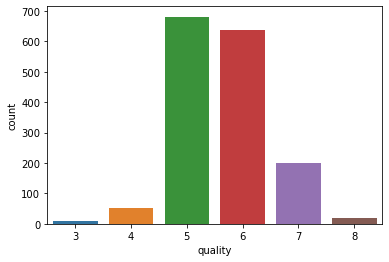

In [8]:
sns.countplot(data=df,x='quality')

<AxesSubplot:xlabel='quality', ylabel='Count'>

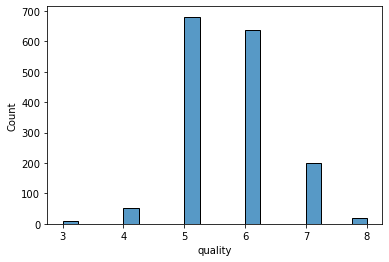

In [9]:
sns.histplot(data=df,x='quality',bins=20)

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

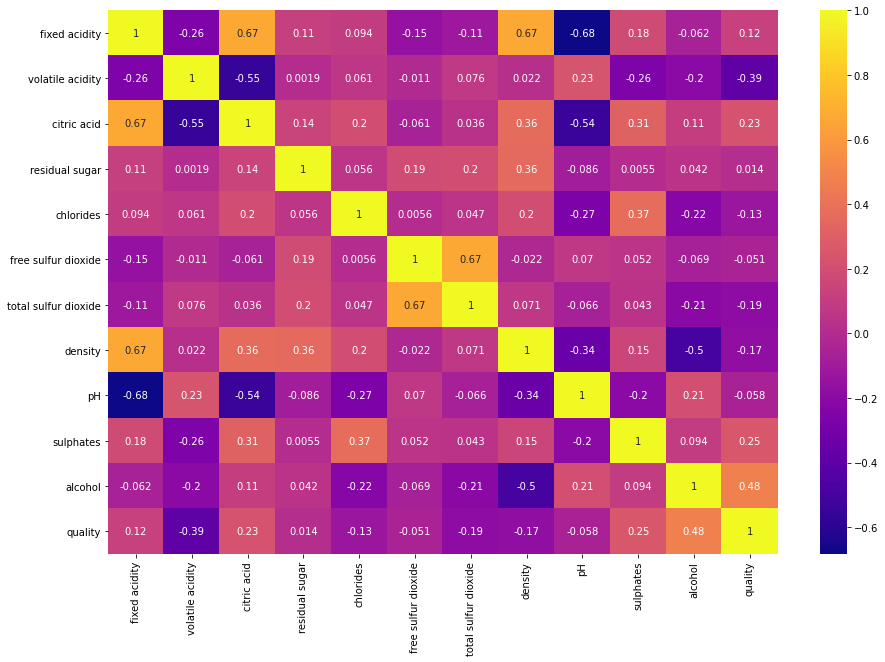

In [11]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='plasma')

In [12]:
df['goodquality']=[1 if x>=7 else 0 for  x in df['quality']]

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
x=df.drop(['quality','goodquality'],axis=1)

In [15]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y=df['goodquality']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: goodquality, dtype: int64

In [17]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [32]:
x_features=x
sc=StandardScaler()
x=sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [22]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [23]:
model1=DecisionTreeClassifier(random_state=1)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.49      0.68      0.57        50

    accuracy                           0.89       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.91      0.89      0.90       480



In [37]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=1)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



In [25]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(random_state=1)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       430
           1       0.47      0.48      0.48        50

    accuracy                           0.89       480
   macro avg       0.70      0.71      0.71       480
weighted avg       0.89      0.89      0.89       480



In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier(random_state=1)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       430
           1       0.54      0.56      0.55        50

    accuracy                           0.90       480
   macro avg       0.74      0.75      0.75       480
weighted avg       0.91      0.90      0.90       480



In [27]:
pip install xgboost

In [28]:
import xgboost as xgb

In [30]:
model5=xgb.XGBClassifier(random_state=1,use_label_encoder=False)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(classification_report(y_test,y_pred5))

[13:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       430
           1       0.59      0.76      0.67        50

    accuracy                           0.92       480
   macro avg       0.78      0.85      0.81       480
weighted avg       0.93      0.92      0.93       480

